In [80]:
import zarr
import xml.etree.ElementTree as ET

n = "20230621_Tokyo_chem_NHS_tub_centr_DNA_021"
p = f"/home/hellgoth/culture-collections/data/single_volumes/images/ome-zarr/{n}.ome.zarr"
f = zarr.open(p, mode="r")["0/0"]

m = p + "/OME/METADATA.ome.xml"
tree = ET.parse(m)
root = tree.getroot()
for el in root.iter():
    if el.tag.endswith("Pixels"):
        break

print(f.shape)
print(
    f'({el.attrib["SizeT"]}, {el.attrib["SizeC"]}, {el.attrib["SizeZ"]}, {el.attrib["SizeY"]}, {el.attrib["SizeX"]})'
)
print(
    f"original file and ome zarr have shape {f.shape} "
    + f"with {round(float(el.attrib['PhysicalSizeZ']), 2)}, {round(float(el.attrib['PhysicalSizeY']), 2)}, {round(float(el.attrib['PhysicalSizeX']), 2)} {el.attrib['PhysicalSizeZUnit']} "
    + "for z y x"
)

(1, 4, 165, 2304, 2304)
(1, 4, 165, 2304, 2304)
original file and ome zarr have shape (1, 4, 165, 2304, 2304) with 0.5, 0.11, 0.03 µm for z y x


In [3]:
import zarr
import xml.etree.ElementTree as ET

n = "20231123_bmcc80_pfa_hoechst-tub-centr_series07"
s = int(n.split("_")[-1].split("series")[-1])
n = "_".join(n.split("_")[:-1])
p = f"/home/hellgoth/culture-collections/data/single_volumes/images/ome-zarr/{n}.ome.zarr"
f = zarr.open(p, mode="r")[f"{s}/0"]

m = p + "/OME/METADATA.ome.xml"
tree = ET.parse(m)
root = tree.getroot()
imgs = []
for el in root.iter():
    if el.tag.endswith("Image"):
        # if "LVCC" not in el.attrib["Name"]:
        imgs.append(el)
for el in imgs[s].iter():
    if el.tag.endswith("Pixels"):
        break

print(f.shape)
print(
    f'({el.attrib["SizeT"]}, {el.attrib["SizeC"]}, {el.attrib["SizeZ"]}, {el.attrib["SizeY"]}, {el.attrib["SizeX"]})'
)
print(
    f"original file and ome zarr have shape {f.shape} "
    + f"with {round(float(el.attrib['PhysicalSizeZ']), 2)}, {round(float(el.attrib['PhysicalSizeY']), 2)}, {round(float(el.attrib['PhysicalSizeX']), 2)} {el.attrib['PhysicalSizeZUnit']} "
    + "for z y x"
)

(1, 3, 91, 1298, 1483)
(1, 3, 91, 1298, 1483)
original file and ome zarr have shape (1, 3, 91, 1298, 1483) with 0.27, 0.1, 0.1 µm for z y x


In [4]:
n, p

('20231123_bmcc80_pfa_hoechst-tub-centr',
 '/home/hellgoth/culture-collections/data/single_volumes/images/ome-zarr/20231123_bmcc80_pfa_hoechst-tub-centr.ome.zarr')

In [7]:
import napari

viewer = napari.Viewer()
for i in range(f.shape[1]):
    viewer.add_image(f[0, i], name=f"ch{i}", colormap="gray")
napari.run()

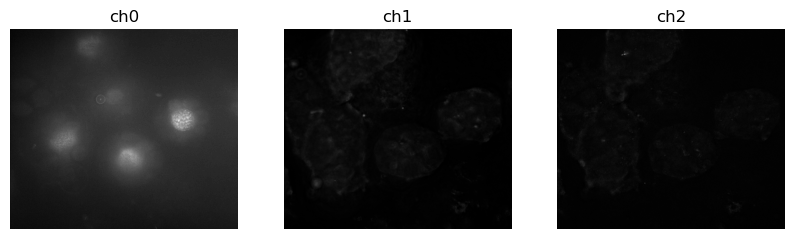

In [6]:
import matplotlib.pyplot as plt

z = 0
fig, axes = plt.subplots(1, f.shape[1], figsize=(10, 5))
for i in range(f.shape[1]):
    axes[i].imshow(f[0, i, z], cmap="gray")
    axes[i].set_title(f"ch{i}")
    axes[i].axis("off")
plt.show()

In [8]:
d.sum()

1482457

In [66]:
for img in imgs:
    for el in img.iter():
        if el.tag.endswith("Pixels"):
            print(
                f'({el.attrib["SizeT"]}, {el.attrib["SizeC"]}, {el.attrib["SizeZ"]}, {el.attrib["SizeY"]}, {el.attrib["SizeX"]})'
            )

(1, 3, 100, 1261, 1173)
(1, 3, 42, 1261, 1173)
(1, 1, 1, 2048, 2048)
(1, 2, 61, 1024, 1024)
(1, 3, 55, 512, 512)
(1, 3, 26, 512, 512)
(1, 3, 54, 512, 512)
(1, 3, 77, 512, 512)
(1, 3, 37, 512, 512)
(1, 1, 37, 512, 512)
(1, 3, 54, 512, 512)
(1, 2, 36, 512, 512)
(1, 2, 36, 512, 512)


In [60]:
m = p + "/OME/METADATA.ome.xml"
tree = ET.parse(m)
root = tree.getroot()
imgs = []
for el in root.iter():
    if el.tag.endswith("Image"):
        if "LVCC" not in el.attrib["Name"]:
            imgs.append(el)
imgs

[<Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d34af00a0c0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d361c29cfe0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d361354bfb0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3612b7b6a0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3613f2e610>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3613f83ec0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3613f89ee0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3613f4bab0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d36135326b0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d3613f9dda0>,
 <Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Image' at 0x7d34a93758a0>,
 <Element '{http://ww

In [62]:
for el in imgs[5].iter():
    if el.tag.endswith("Pixels"):
        break
print(el)

<Element '{http://www.openmicroscopy.org/Schemas/OME/2016-06}Pixels' at 0x7d3613f82520>


In [15]:
p = "/mnt/embl/g/dey/Jonas_Hellgoth/culture-collections_project/corrupted_files/20231123_bmcc80_pfa_hoechst-tub-centr.ome.zarr"
f = zarr.open(p, mode="r")["7/0"]
f.shape

(1, 3, 91, 1298, 1483)

In [16]:
p = "/mnt/embl/g/dey/Jonas_Hellgoth/culture-collections_project/corrupted_files/20231123_bmcc80_pfa_hoechst-tub-centr.ome.zarr"
f2 = zarr.open(p, mode="r")["6/0"]
f2.shape

(1, 3, 91, 1298, 1483)

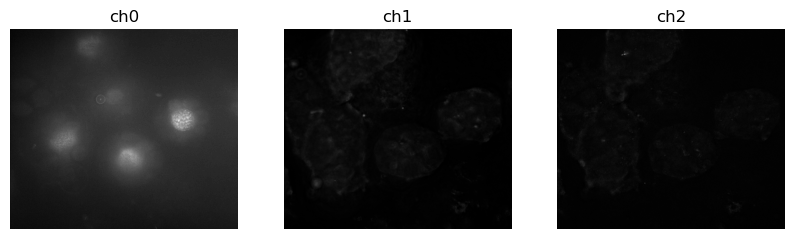

In [17]:
import matplotlib.pyplot as plt

z = 0
fig, axes = plt.subplots(1, f.shape[1], figsize=(10, 5))
for i in range(f.shape[1]):
    axes[i].imshow(f[0, i, z], cmap="gray")
    axes[i].set_title(f"ch{i}")
    axes[i].axis("off")
plt.show()

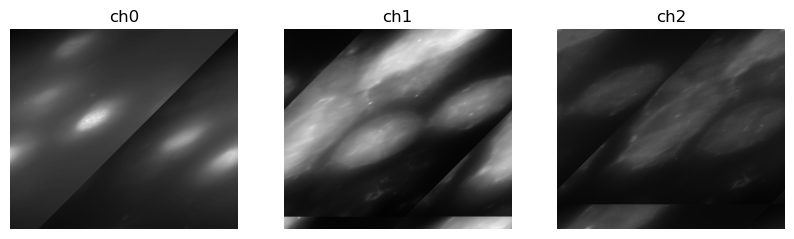

In [18]:
import matplotlib.pyplot as plt

z = 0
fig, axes = plt.subplots(1, f2.shape[1], figsize=(10, 5))
for i in range(f2.shape[1]):
    axes[i].imshow(f2[0, i, z], cmap="gray")
    axes[i].set_title(f"ch{i}")
    axes[i].axis("off")
plt.show()